<a href="https://colab.research.google.com/github/prasadsonar2/Exploratory-Data-Analysis-/blob/master/Climate_connect_casestudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **synopsis**


Time Series model : FBprophet

 Load forcasing is done based upon given data with the help of FBprophet 
time series forcasting model."humidity" is taken as an additional regressor taken into account to trace the effects on load forcasting for missing dates insted of rain values as it is missing in given data. we can add an additional regresor to model to finetune the forcast.Aditionally the country holidays are taken into considerstion to trace its effect on the electricity cosumption. with tunning of model obtained MAPE score about 23% and henceforth model is used for further prediction


Steps taken ;
   



     1 . Checked null timestamps , sotune the forcastrted data 

     2. trained model along with humidity as an additional regressor, along with the considaration of country holidays 

     3. Obtained MAPE score about 23% 

     4. forcasted load values for 13 and 14 Dec 2020





Future scope ;
      1. Various other forcasting methods like LSTM and so can be taken into consideration 
      
      2. there is scope to tune the existing model 
       **bold text**

In [ ]:
from google.colab import files
  
  
uploaded = files.upload()

Saving main.csv to main.csv


In [ ]:
import numpy as np 
import pandas as pd 
import plotly as py
from plotly.offline import iplot, plot, init_notebook_mode, download_plotlyjs
import plotly.graph_objs as go
import plotly.offline as offline
import seaborn as sns
import matplotlib.pyplot as plt

import datetime

In [ ]:
import pandas as pd
import io
  
load_profile = pd.read_csv(io.BytesIO(uploaded['main.csv']))
print(load_profile)

                   datetime   load  ...  cloud_cover        date
0       2018-01-01 00:00:00  803.0  ...       0.0000  01-01-2018
1       2018-01-01 00:15:00  775.0  ...       0.0000  01-01-2018
2       2018-01-01 00:30:00  731.0  ...       0.0000  01-01-2018
3       2018-01-01 00:45:00  714.0  ...       0.0000  01-01-2018
4       2018-01-01 01:00:00  699.0  ...       0.0000  01-01-2018
...                     ...    ...  ...          ...         ...
103579  2020-12-14 22:45:00    NaN  ...       0.0000  14-12-2020
103580  2020-12-14 23:00:00    NaN  ...       0.0000  14-12-2020
103581  2020-12-14 23:15:00    NaN  ...       0.8925  14-12-2020
103582  2020-12-14 23:30:00    NaN  ...       0.8925  14-12-2020
103583  2020-12-14 23:45:00    NaN  ...       0.8610  14-12-2020

[103584 rows x 9 columns]


In [ ]:
load_profile.head(5)

,datetime,load,apparent_temperature,temperature,humidity,dew_point,wind_speed,cloud_cover,date
0,2018-01-01 00:00:00,803.0,10.45800,10.45800,0.955500,8.946000,0.0,0.0,01-01-2018
1,2018-01-01 00:15:00,775.0,10.32675,10.32675,0.961625,8.911875,0.0,0.0,01-01-2018
2,2018-01-01 00:30:00,731.0,10.19550,10.19550,0.967750,8.877750,0.0,0.0,01-01-2018
3,2018-01-01 00:45:00,714.0,10.06425,10.06425,0.973875,8.843625,0.0,0.0,01-01-2018
4,2018-01-01 01:00:00,699.0,9.93300,9.93300,0.980000,8.809500,0.0,0.0,01-01-2018


In [ ]:

load_profile.index=load_profile.datetime
#Converting index to Datetime format
load_profile.index = pd.to_datetime(load_profile.index)


In [ ]:
load_profile.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 103584 entries, 2018-01-01 00:00:00 to 2020-12-14 23:45:00
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   datetime              103584 non-null  object 
 1   load                  101952 non-null  float64
 2   apparent_temperature  103584 non-null  float64
 3   temperature           103584 non-null  float64
 4   humidity              103584 non-null  float64
 5   dew_point             103584 non-null  float64
 6   wind_speed            103584 non-null  float64
 7   cloud_cover           103584 non-null  float64
 8   date                  103584 non-null  object 
dtypes: float64(7), object(2)
memory usage: 7.9+ MB


In [ ]:
lp_sorted = load_profile.sort_index() ## sorting index to get dates serially

In [ ]:
lp_sorted.drop(columns="datetime",inplace=True)

In [ ]:
pd.options.plotting.backend = 'plotly'# Graphing
lp_sorted.resample("D").count().plot()

## Graph shows missing data on below dates
  16-19 may 2019
  15-18 jul 2019
  27 Oct 2019
  31 Dec 2019 - 1 jan 2020
  22 march 2020
  10 May 2020
  10 jun 2020
  10 july 2020
  13-14 Dec 2020

In [ ]:
lp_sorted["load"].isnull().sum() ## total missing time stamp

1632

In [ ]:
lp_sorted

,load,apparent_temperature,temperature,humidity,dew_point,wind_speed,cloud_cover,date
datetime,,,,,,,,
2018-01-01 00:00:00,803.0,10.458000,10.458000,0.955500,8.946000,0.0000,0.0000,01-01-2018
2018-01-01 00:15:00,775.0,10.326750,10.326750,0.961625,8.911875,0.0000,0.0000,01-01-2018
2018-01-01 00:30:00,731.0,10.195500,10.195500,0.967750,8.877750,0.0000,0.0000,01-01-2018
2018-01-01 00:45:00,714.0,10.064250,10.064250,0.973875,8.843625,0.0000,0.0000,01-01-2018
2018-01-01 01:00:00,699.0,9.933000,9.933000,0.980000,8.809500,0.0000,0.0000,01-01-2018
...,...,...,...,...,...,...,...,...
2020-12-14 22:45:00,NaN,12.450375,12.450375,0.611625,4.087125,1.9110,0.0000,14-12-2020
2020-12-14 23:00:00,NaN,12.285000,12.285000,0.619500,4.084500,1.8795,0.0000,14-12-2020
2020-12-14 23:15:00,NaN,13.650000,13.650000,0.829500,8.589000,2.4675,0.8925,14-12-2020


# Time series Model

 We will be Fb prophet time seriers forcasting model to predict the 1 st missing span and so on ...

we will add humidity	as an affecting regressor to model , we can change/ add it as per requirment 

In [ ]:
lp_Main=lp_sorted['2018-01-01 00:00:00' : '2020-12-12 00:00:00']## geting Data till 12 Dec to Model traing 

In [ ]:
lp_Main["ds"]=lp_Main.index
lp_Main["y"]=lp_Main.load


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
lp_Main

,load,apparent_temperature,temperature,humidity,dew_point,wind_speed,cloud_cover,date,ds,y
datetime,,,,,,,,,,
2018-01-01 00:00:00,803.0,10.45800,10.45800,0.955500,8.946000,0.0000,0.0000,01-01-2018,2018-01-01 00:00:00,803.0
2018-01-01 00:15:00,775.0,10.32675,10.32675,0.961625,8.911875,0.0000,0.0000,01-01-2018,2018-01-01 00:15:00,775.0
2018-01-01 00:30:00,731.0,10.19550,10.19550,0.967750,8.877750,0.0000,0.0000,01-01-2018,2018-01-01 00:30:00,731.0
2018-01-01 00:45:00,714.0,10.06425,10.06425,0.973875,8.843625,0.0000,0.0000,01-01-2018,2018-01-01 00:45:00,714.0
2018-01-01 01:00:00,699.0,9.93300,9.93300,0.980000,8.809500,0.0000,0.0000,01-01-2018,2018-01-01 01:00:00,699.0
...,...,...,...,...,...,...,...,...,...,...
2020-12-11 23:00:00,915.0,20.46450,20.46450,0.441000,6.426000,0.5880,0.0000,12-11-2020,2020-12-11 23:00:00,915.0
2020-12-11 23:15:00,891.0,19.95000,19.95000,0.399000,8.326500,1.6275,0.6615,12-11-2020,2020-12-11 23:15:00,891.0
2020-12-11 23:30:00,848.0,19.95000,19.95000,0.409500,8.295000,1.5750,0.8820,12-11-2020,2020-12-11 23:30:00,848.0


In [ ]:
lp_Main=lp_Main.loc[:, ['humidity', 'ds',"y"]]#

In [ ]:
lp_Main

,humidity,ds,y
datetime,,,
2018-01-01 00:00:00,0.955500,2018-01-01 00:00:00,803.0
2018-01-01 00:15:00,0.961625,2018-01-01 00:15:00,775.0
2018-01-01 00:30:00,0.967750,2018-01-01 00:30:00,731.0
2018-01-01 00:45:00,0.973875,2018-01-01 00:45:00,714.0
2018-01-01 01:00:00,0.980000,2018-01-01 01:00:00,699.0
...,...,...,...
2020-12-11 23:00:00,0.441000,2020-12-11 23:00:00,915.0
2020-12-11 23:15:00,0.399000,2020-12-11 23:15:00,891.0
2020-12-11 23:30:00,0.409500,2020-12-11 23:30:00,848.0


In [ ]:
train=lp_Main[ : "2019-05-01 00:00:00"]

In [ ]:
test=lp_Main[  "2019-05-01 00:00:00":"2019-05-15 23:45:00"]

In [ ]:
#load prophet library
from fbprophet import Prophet
#load 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
train, test

(                     humidity                  ds       y
 datetime                                                 
 2018-01-01 00:00:00  0.955500 2018-01-01 00:00:00   803.0
 2018-01-01 00:15:00  0.961625 2018-01-01 00:15:00   775.0
 2018-01-01 00:30:00  0.967750 2018-01-01 00:30:00   731.0
 2018-01-01 00:45:00  0.973875 2018-01-01 00:45:00   714.0
 2018-01-01 01:00:00  0.980000 2018-01-01 01:00:00   699.0
 ...                       ...                 ...     ...
 2019-04-30 23:00:00  0.210000 2019-04-30 23:00:00  2574.0
 2019-04-30 23:15:00  0.199500 2019-04-30 23:15:00  2550.0
 2019-04-30 23:30:00  0.199500 2019-04-30 23:30:00  2545.0
 2019-04-30 23:45:00  0.210000 2019-04-30 23:45:00  2517.0
 2019-05-01 00:00:00  0.945000 2019-05-01 00:00:00   902.0
 
 [46561 rows x 3 columns],
                      humidity                  ds       y
 datetime                                                 
 2019-05-01 00:00:00   0.94500 2019-05-01 00:00:00   902.0
 2019-05-01 00:15:00   0.95

In [ ]:
from fbprophet import Prophet
m = Prophet(yearly_seasonality=True)
m.add_regressor('humidity')#addinging humidity as regressor
m.add_country_holidays(country_name="IND")
m.fit(train)

In [ ]:
future = m.make_future_dataframe(periods=1440, freq="15 min") # adding future periods

In [ ]:
future 

,ds
0,2018-01-01 00:00:00
1,2018-01-01 00:15:00
2,2018-01-01 00:30:00
3,2018-01-01 00:45:00
4,2018-01-01 01:00:00
...,...
47996,2019-05-15 23:00:00
47997,2019-05-15 23:15:00
47998,2019-05-15 23:30:00
47999,2019-05-15 23:45:00


In [ ]:
lp_future=lp_Main[:"2019-05-16 00:00:00"] ##To add "humidity " as an additional regressor, we need add humidity values to future timestamp 

In [ ]:
lp_future["y"].fillna( method ='ffill', inplace = True)
  

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
 future["humidity"]=lp_future['humidity'].values

In [ ]:
future

,ds,humidity
0,2018-01-01 00:00:00,0.955500
1,2018-01-01 00:15:00,0.961625
2,2018-01-01 00:30:00,0.967750
3,2018-01-01 00:45:00,0.973875
4,2018-01-01 01:00:00,0.980000
...,...,...
47996,2019-05-15 23:00:00,0.493500
47997,2019-05-15 23:15:00,0.703500
47998,2019-05-15 23:30:00,0.682500
47999,2019-05-15 23:45:00,0.640500


In [ ]:
# Prediction
prediction =  m.predict(future)

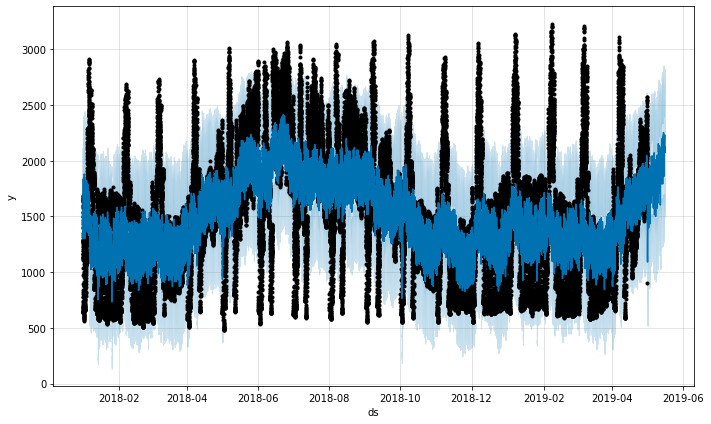

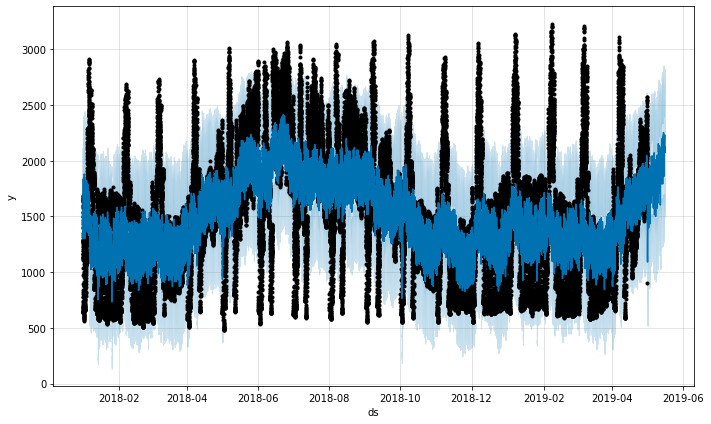

In [ ]:
# Plot Prediction
m.plot(prediction)

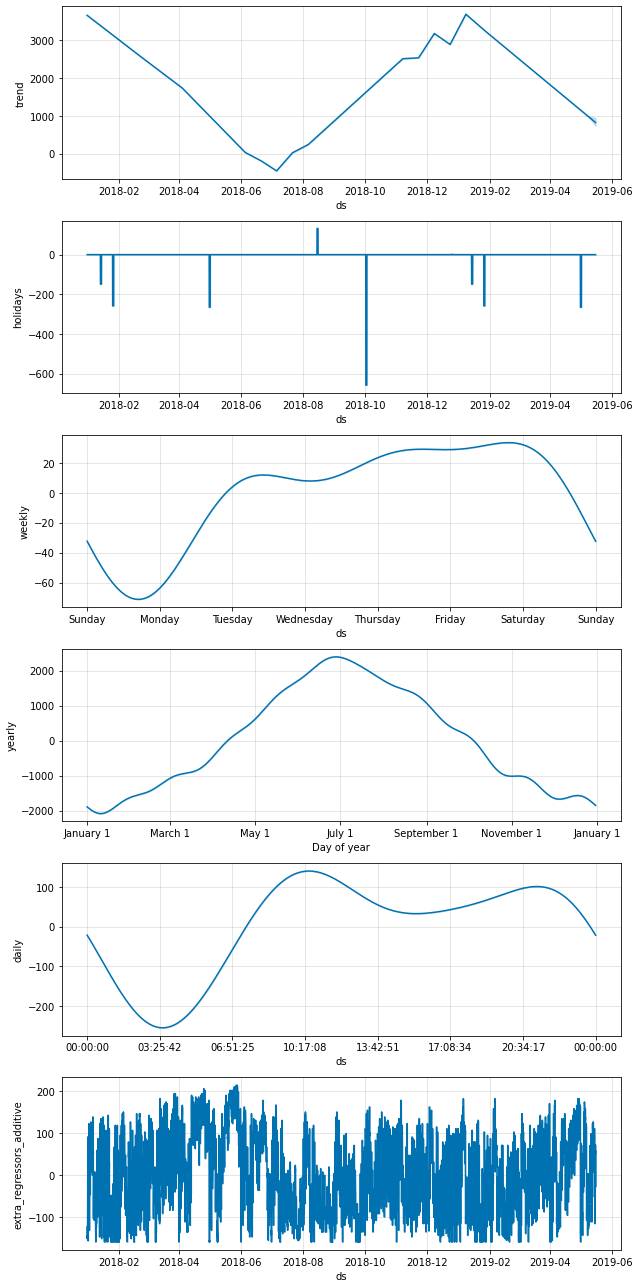

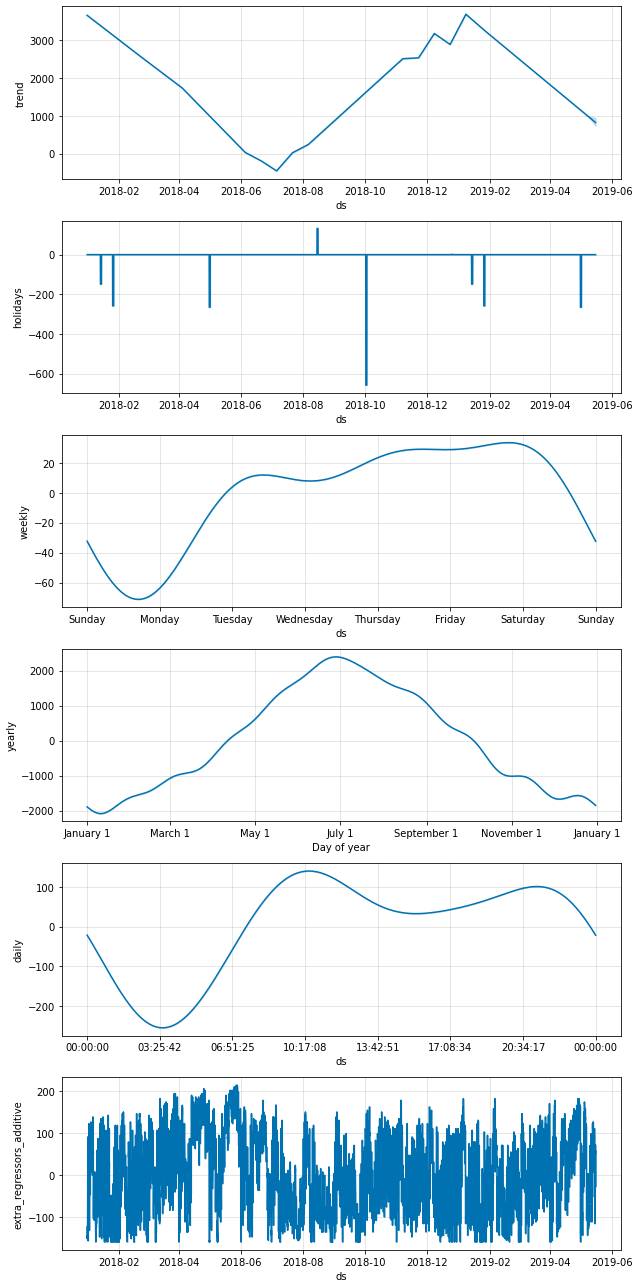

In [ ]:
m.plot_components(prediction) ## Shows component consist in model 

In [ ]:
#plot the predicted value and observed value
from plotly.offline import plot
plot([
    go.Scatter(x=lp_future['ds'], y=lp_future['y'], name='y'),
    go.Scatter(x=prediction['ds'], y=prediction['yhat'], name='yhat'),
    go.Scatter(x=prediction['ds'], y=prediction['yhat_upper'], fill='tonexty', mode='none', name='upper'),
    go.Scatter(x=prediction['ds'], y=prediction['yhat_lower'], fill='tonexty', mode='none', name='lower')
])

'temp-plot.html'

In [ ]:
lp_future.shape

(48001, 3)

In [ ]:
prediction.shape

(48001, 49)

In [ ]:
### checking MAPE %%


def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
mean_absolute_percentage_error(y_true=lp_future['y'],
                   y_pred=prediction['yhat'])

23.70794480150976

Model Showing 23% MAPE error


We wiill be obtaining NAN values from tuned FBprophet model 

Below are the Missing dates, we will predict the values based upon previous data 

"16-19 may 2019 15-18 jul 2019 27 Oct 2019 31 Dec 2019 - 1 jan 2020 22 march 2020 10 May 2020 10 jun 2020 10 july 2020 13-14 Dec 2020"


Task 1. Short term forcast for 13 ,14 Dec 2020

In [ ]:
lp_Main

,humidity,ds,y
datetime,,,
2018-01-01 00:00:00,0.955500,2018-01-01 00:00:00,803.0
2018-01-01 00:15:00,0.961625,2018-01-01 00:15:00,775.0
2018-01-01 00:30:00,0.967750,2018-01-01 00:30:00,731.0
2018-01-01 00:45:00,0.973875,2018-01-01 00:45:00,714.0
2018-01-01 01:00:00,0.980000,2018-01-01 01:00:00,699.0
...,...,...,...
2020-12-11 23:00:00,0.441000,2020-12-11 23:00:00,915.0
2020-12-11 23:15:00,0.399000,2020-12-11 23:15:00,891.0
2020-12-11 23:30:00,0.409500,2020-12-11 23:30:00,848.0


In [ ]:
from fbprophet import Prophet
m = Prophet(yearly_seasonality=True)
m.add_regressor('humidity')#addinging humidity as regressor
m.add_country_holidays(country_name="IND")
m.fit(lp_Main)

In [ ]:
future = m.make_future_dataframe(periods=287, freq="15 min") # adding future periods (13 and 14 dec)

In [ ]:
future["humidity"]=lp_sorted['humidity'].values ## adding regressor values

In [ ]:
future

,ds,humidity
0,2018-01-01 00:00:00,0.955500
1,2018-01-01 00:15:00,0.961625
2,2018-01-01 00:30:00,0.967750
3,2018-01-01 00:45:00,0.973875
4,2018-01-01 01:00:00,0.980000
...,...,...
103579,2020-12-14 22:45:00,0.611625
103580,2020-12-14 23:00:00,0.619500
103581,2020-12-14 23:15:00,0.829500
103582,2020-12-14 23:30:00,0.829500


In [ ]:
prediction =  m.predict(future) ## predicting load values for 13 and 14 DEC

In [ ]:
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas,Christmas_lower,Christmas_upper,Gandhi Jayanti,Gandhi Jayanti_lower,Gandhi Jayanti_upper,Independence Day,Independence Day_lower,Independence Day_upper,Labour Day,Labour Day_lower,Labour Day_upper,Makar Sankranti / Pongal,Makar Sankranti / Pongal_lower,Makar Sankranti / Pongal_upper,Republic Day,Republic Day_lower,Republic Day_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,holidays,holidays_lower,holidays_upper,humidity,humidity_lower,humidity_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01 00:00:00,1592.337724,766.716750,1835.981347,1592.337724,1592.337724,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-292.814865,-292.814865,-292.814865,14.714126,14.714126,14.714126,-48.373732,-48.373732,-48.373732,0.0,0.0,0.0,-48.373732,-48.373732,-48.373732,-39.942612,-39.942612,-39.942612,-219.212648,-219.212648,-219.212648,0.0,0.0,0.0,1299.522859
1,2018-01-01 00:15:00,1592.334844,728.662694,1810.973588,1592.334844,1592.334844,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-316.831751,-316.831751,-316.831751,-8.891965,-8.891965,-8.891965,-49.212829,-49.212829,-49.212829,0.0,0.0,0.0,-49.212829,-49.212829,-49.212829,-39.393520,-39.393520,-39.393520,-219.333437,-219.333437,-219.333437,0.0,0.0,0.0,1275.503093
2,2018-01-01 00:30:00,1592.331964,674.361371,1777.881878,1592.331964,1592.331964,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-342.003520,-342.003520,-342.003520,-33.659986,-33.659986,-33.659986,-50.051926,-50.051926,-50.051926,0.0,0.0,0.0,-50.051926,-50.051926,-50.051926,-38.837606,-38.837606,-38.837606,-219.454003,-219.454003,-219.454003,0.0,0.0,0.0,1250.328445
3,2018-01-01 00:45:00,1592.329084,658.364175,1770.801020,1592.329084,1592.329084,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-367.788421,-367.788421,-367.788421,-59.047913,-59.047913,-59.047913,-50.891023,-50.891023,-50.891023,0.0,0.0,0.0,-50.891023,-50.891023,-50.891023,-38.275143,-38.275143,-38.275143,-219.574343,-219.574343,-219.574343,0.0,0.0,0.0,1224.540663
4,2018-01-01 01:00:00,1592.326204,635.311442,1754.934590,1592.326204,1592.326204,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-393.631030,-393.631030,-393.631030,-84.500046,-84.500046,-84.500046,-51.730119,-51.730119,-51.730119,0.0,0.0,0.0,-51.730119,-51.730119,-51.730119,-37.706408,-37.706408,-37.706408,-219.694457,-219.694457,-219.694457,0.0,0.0,0.0,1198.695174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103579,2020-12-14 22:45:00,1526.566335,1060.357198,2152.754198,1526.566335,1526.566335,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.674828,57.674828,57.674828,99.943973,99.943973,99.943973,-1.264446,-1.264446,-1.264446,0.0,0.0,0.0,-1.264446,-1.264446,-1.264446,8.195019,8.195019,8.195019,-49.199718,-49.199718,-49.199718,0.0,0.0,0.0,1584.241164
103580,2020-12-14 23:00:00,1526.576126,1043.105268,2158.243591,1526.576126,1526.576126,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.364382,45.364382,45.364382,88.349715,88.349715,88.349715,-2.343284,-2.343284,-2.343284,0.0,0.0,0.0,-2.343284,-2.343284,-2.343284,8.468375,8.468375,8.468375,-49.110424,-49.110424,-49.110424,0.0,0.0,0.0,1571.940507
103581,2020-12-14 23:15:00,1526.585916,974.211841,2068.220916,1526.585916,1526.585916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.399043,2.399043,2.399043,73.798570,73.798570,73.798570,-31.112314,-31.112314,-31.112314,0.0,0.0,0.0,-31.112314,-31.112314,-31.112

In [ ]:
from google.colab import files
prediction.to_csv('prediction(14 Dec 2020).csv') 
files.download("prediction(14 Dec 2020).csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>